
##### <center> <b>Master in Data Science and Engineering</b> </center>

<center> <img src="https://www.eurosis.org/cms/files/conf/esm/esm2014/logo-feup.png" width="300"> </center>

### <center><b>MECD06 - Artificial Intelligence</b></center>

### <center> Artificial Intelligence Group Project </center>

#### <center> Porto </center>
#### <center> 25/03/2022 </center>

## TSP - Travel salesman problem

The travelling salesman problem (also called the travelling salesperson problem or TSP) asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?" 

<center> <img src="https://tocontandoashoras.files.wordpress.com/2012/08/mundoealfinetes-756050.jpg" width="800"> </center

### Libraries

In [106]:
import numpy as np
import pandas as pd
import gmplot
import time
import random
import math
import matplotlib.pyplot as plt
import copy
import sys
from datetime import datetime
import warnings
import sys
import random
import copy
from random import choice
import dataframe_image as dfi
warnings.filterwarnings("ignore")

### Number of Interactions (for all algorithms)

In [107]:
#setting number of interactions for all algorithms
num_inter = 10000

### Data

In [108]:
#read data
cidades = pd.read_excel('cities.xlsx', index_col=0)
cidades

,Lisboa,Porto,Braga,Setubal,Coimbra,Evora,Aveiro,Leiria,Faro,Viana do Castelo,Beja,Braganca,Castelo Branco,Guarda
Lisboa,0,312,364,49,205,133,255,145,277,385,176,484,224,319
Porto,315,0,54,349,118,405,75,181,549,76,448,205,258,200
Braga,367,56,0,400,170,456,126,233,601,61,500,217,309,252
Setubal,50,347,399,0,240,99,290,180,244,420,143,519,259,354
Coimbra,207,117,169,240,0,242,60,73,441,191,340,283,140,152
Evora,133,402,453,99,294,0,345,235,226,475,80,462,195,290
Aveiro,256,73,125,290,59,346,0,122,490,146,389,268,199,158
Leiria,147,181,233,181,74,237,124,0,381,254,281,353,165,222
Faro,278,548,599,245,440,226,490,381,0,621,146,720,460,554
Viana do Castelo,387,75,61,420,190,476,146,253,621,0,520,271,329,271


In [109]:
# Teste
cities4_4 = cidades.loc[['Porto','Braga','Aveiro','Viana do Castelo'], ['Porto','Braga','Aveiro','Viana do Castelo']]
cities4_4

,Porto,Braga,Aveiro,Viana do Castelo
Porto,0,54,75,76
Braga,56,0,126,61
Aveiro,73,125,0,146
Viana do Castelo,75,61,146,0


In [110]:
# Portugal
cities14_14 = cidades
cities14_14

,Lisboa,Porto,Braga,Setubal,Coimbra,Evora,Aveiro,Leiria,Faro,Viana do Castelo,Beja,Braganca,Castelo Branco,Guarda
Lisboa,0,312,364,49,205,133,255,145,277,385,176,484,224,319
Porto,315,0,54,349,118,405,75,181,549,76,448,205,258,200
Braga,367,56,0,400,170,456,126,233,601,61,500,217,309,252
Setubal,50,347,399,0,240,99,290,180,244,420,143,519,259,354
Coimbra,207,117,169,240,0,242,60,73,441,191,340,283,140,152
Evora,133,402,453,99,294,0,345,235,226,475,80,462,195,290
Aveiro,256,73,125,290,59,346,0,122,490,146,389,268,199,158
Leiria,147,181,233,181,74,237,124,0,381,254,281,353,165,222
Faro,278,548,599,245,440,226,490,381,0,621,146,720,460,554
Viana do Castelo,387,75,61,420,190,476,146,253,621,0,520,271,329,271


In [111]:
#Europa
europa = pd.read_excel('europe_cities.xlsx', index_col=0)
europa

,Amsterdam,Antwerp,Athens,Barcelona,Berlin,Bern,Brussels,Calais,Cologne,Copenhagen,...,Prague,Rome,Rotterdam,Strasbourg,Stuttgart,The Hague,Turin,Venice,Vienna,Zurich
Amsterdam,0,160,3082,1639,649,875,209,385,280,904,...,973,1835,80,683,703,56,1264,1449,1196,861
Antwerp,160,0,2766,1465,723,704,46,211,237,861,...,870,1660,100,544,659,139,1090,1275,1180,687
Athens,3082,2766,0,3312,2552,2627,3021,2976,2562,3414,...,2198,2551,2826,2581,2428,3061,2250,1995,1886,2449
Barcelona,1639,1465,3312,0,1899,913,1419,1399,1539,2230,...,1679,1471,1565,1072,1263,1589,892,1327,1989,1036
Berlin,649,723,2552,1899,0,986,782,936,575,743,...,354,1573,697,801,636,712,1172,1108,666,863
Bern,875,704,2627,913,986,0,655,854,583,1392,...,766,897,802,232,350,825,312,642,907,123
Brussels,209,46,3021,1419,782,655,0,212,219,1035,...,911,1615,146,488,641,170,1044,1229,1134,641
Calais,385,211,2976,1399,936,854,212,0,431,1075,...,1082,1738,311,627,792,352,1110,1352,1346,764
Cologne,280,237,2562,1539,575,583,219,431,0,730,...,659,1586,254,402,395,283,1015,1072,915,612
Copenhagen,904,861,3414,2230,743,1392,1035,1075,730,0,...,1033,2352,813,1158,1178,960,1527,1708,1345,1378


## Metaheuristics for Optimization/Decision Problems
   - #### Hill-Climbing 
   - #### Simulated Annealing
   - #### Tabu Search 
   - #### Genetic Algorithms

## 1: Hill-Climbing

### Algorithm base for both Hill-Climbing and Simulated Annealing

In [112]:
# This class represent a state
class State:
    # Create a new state
    def __init__(self, route:[], distance:int=0):
        self.route = route
        self.distance = distance
    # Compare states
    def __eq__(self, other):
        for i in range(len(self.route)):
            if(self.route[i] != other.route[i]):
                return False
        return True
    # Sort states
    def __lt__(self, other):
         return self.distance < other.distance
    # Print a state
    def __repr__(self):
        return ('({0},{1})\n'.format(self.route, self.distance))
    # Create a shallow copy
    def copy(self):
        return State(self.route, self.distance)
    # Create a deep copy
    def deepcopy(self):
        return State(copy.deepcopy(self.route), copy.deepcopy(self.distance))
    # Update distance
    def update_distance(self, matrix, home):
        
        # Reset distance
        self.distance = 0
        # Keep track of departing city
        from_index = home
        # Loop all cities in the current route
        for i in range(len(self.route)):
            self.distance += matrix[from_index][self.route[i]]
            from_index = self.route[i]
        # Add the distance back to home
        self.distance += matrix[from_index][home]
# This class represent a city (used when we need to delete cities)
class City:
    # Create a new city
    def __init__(self, index:int, distance:int):
        self.index = index
        self.distance = distance
    # Sort cities
    def __lt__(self, other):
         return self.distance < other.distance
# Get the best random solution from a population
def get_random_solution(matrix:[], home:int, city_indexes:[], size:int, use_weights=False):
    # Create a list with city indexes
    cities = city_indexes.copy()
    # Remove the home city
    cities.pop(home)
    # Create a population
    population = []
    for i in range(size):
        # Shuffle cities at random
        random.shuffle(cities)
        # Create a state
        state = State(cities[:])
        state.update_distance(matrix, home)
        # Add an individual to the population
        population.append(state)
    # Sort population
    population.sort()
    # Return the best solution
    return population[0]

# Get best solution by distance
def get_best_solution_by_distance(matrix:[], home:int):
    
    # Variables
    route = []
    from_index = home
    length = len(matrix) - 1
    # Loop until route is complete
    while len(route) < length:
         # Get a matrix row
        row = matrix[from_index]
        # Create a list with cities
        cities = {}
        for i in range(len(row)):
            cities[i] = City(i, row[i])
        # Remove cities that already is assigned to the route
        del cities[home]
        for i in route:
            del cities[i]
        # Sort cities
        sorted = list(cities.values())
        sorted.sort()
        # Add the city with the shortest distance
        from_index = sorted[0].index
        route.append(from_index)
    # Create a new state and update the distance
    state = State(route)
    state.update_distance(matrix, home)
    # Return a state
    return state

# Mutate a solution
def mutate(matrix:[], home:int, state:State, mutation_rate:float=0.01):
    
    # Create a copy of the state
    mutated_state = state.deepcopy()
    # Loop all the states in a route
    for i in range(len(mutated_state.route)):
        # Check if we should do a mutation
        if(random.random() < mutation_rate):
            # Swap two cities
            j = int(random.random() * len(state.route))
            city_1 = mutated_state.route[i]
            city_2 = mutated_state.route[j]
            mutated_state.route[i] = city_2
            mutated_state.route[j] = city_1
    # Update the distance
    mutated_state.update_distance(matrix, home)
    # Return a mutated state
    return mutated_state

#### Hill-Climbing specific variables

In [113]:
# Setting mutation rate:
mut_rate = 0.7

# Hill climbing algorithm
def hill_climbing(matrix:[], home:int, initial_state:State, max_iterations:int, mutation_rate:float=0.01):
    # Keep track of the best state
    best_state = initial_state
    # An iterator can be used to give the algorithm more time to find a solution
    iterator = 0
    #list row
    row =[]
    # Create an infinite loop
    while True:
        # Mutate the best state
        neighbor = mutate(matrix, home, best_state, mutation_rate)
        # Check if the distance is less than in the best state
        if(neighbor.distance >= best_state.distance):
            iterator += 1
            if (iterator >= max_iterations):
                break
        if(neighbor.distance < best_state.distance):
            best_state = neighbor
        row = row+ [[iterator,neighbor.distance]]
    # Return the best state
    return best_state, row

### 1.1 Test Data

In [114]:
cities4_4_hill_climbing  = cities4_4.to_numpy()
cities4_4_hill_climbing

array([[  0,  54,  75,  76],
       [ 56,   0, 126,  61],
       [ 73, 125,   0, 146],
       [ 75,  61, 146,   0]], dtype=int64)

In [115]:
#Get time of processing
start_time = time.time()

# Distances in km between cities, same indexes (i, j) as in the cities array
matrix = cities4_4_hill_climbing
# Cities to travel
cities = ['Porto','Braga','Aveiro','Viana do Castelo']
city_indexes = [0,1,2,3]

# Index of start location
home = random.randrange(0,4)

# Max iterations
max_iterations = num_inter

# Distances in km between cities, same indexes (i, j) as in the cities array
matrix = cities4_4_hill_climbing

# Run hill climbing to find a better solution
state = get_best_solution_by_distance(matrix, home)
state,iterations = hill_climbing(matrix, home, state, max_iterations, mut_rate)

print('-- Hill climbing solution --')
print(cities[home], end='')
df = [cities[home]]
for i in range(0, len(state.route)):
    print(' -> ' + cities[state.route[i]], end='')
    df.append(cities[state.route[i]]) 
print(' -> ' + cities[home], end='')
df.append(cities[home])
print('\n\nTotal distance: {0} km'.format(state.distance))
print()

#time
hill_teste_time = time.time() - start_time
print("--- %s seconds ---" % (hill_teste_time))

-- Hill climbing solution --
Braga -> Viana do Castelo -> Aveiro -> Porto -> Braga

Total distance: 334 km

--- 0.3976008892059326 seconds ---


#### Data Frame solution

In [116]:
#Get the Sequence
Solution_hill_4_4 = pd.Series(df[:-1], name = "Cities")
route_teste_hill = Solution_hill_4_4
#transform df
dados = pd.DataFrame(Solution_hill_4_4)
dados['Distance'] = 0
#Get the distances
for i in range(3):
    dados['Distance'].iloc[0] = cidades[dados.iloc[0][0]][dados.iloc[3][0]] 
    dados['Distance'].iloc[i+1] = cidades[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados

,Cities,Distance
0,Braga,54
1,Viana do Castelo,61
2,Aveiro,146
3,Porto,73


#### Total Distance

In [117]:
#Minimal distance
hill_teste_distance = dados['Distance'].sum()
hill_teste_distance

334

#### Iteration X Distance

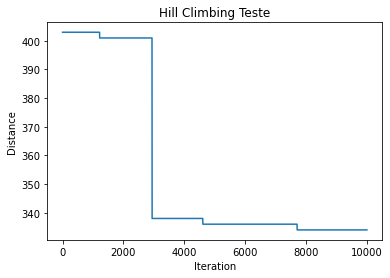

In [118]:
# Dataframe
hill_plot = pd.DataFrame(iterations,columns =['Interaction','Distance'])

# teste
x = hill_plot['Interaction']
y = hill_plot['Distance'].sort_values(ascending=False)
plt.plot(x,y)
plt.xlabel('Iteration') 
plt.ylabel('Distance') 
  
# displaying the title
plt.title("Hill Climbing Teste")
plt.savefig("Hill_Climbing_Teste_Distance_Behaviour")
plt.show()

### 1.2 Portugal Data

In [119]:
cities14_14_hill_climbing  = cities14_14.to_numpy()
cities14_14_hill_climbing

array([[  0, 312, 364,  49, 205, 133, 255, 145, 277, 385, 176, 484, 224,
        319],
       [315,   0,  54, 349, 118, 405,  75, 181, 549,  76, 448, 205, 258,
        200],
       [367,  56,   0, 400, 170, 456, 126, 233, 601,  61, 500, 217, 309,
        252],
       [ 50, 347, 399,   0, 240,  99, 290, 180, 244, 420, 143, 519, 259,
        354],
       [207, 117, 169, 240,   0, 242,  60,  73, 441, 191, 340, 283, 140,
        152],
       [133, 402, 453,  99, 294,   0, 345, 235, 226, 475,  80, 462, 195,
        290],
       [256,  73, 125, 290,  59, 346,   0, 122, 490, 146, 389, 268, 199,
        158],
       [147, 181, 233, 181,  74, 237, 124,   0, 381, 254, 281, 353, 165,
        222],
       [278, 548, 599, 245, 440, 226, 490, 381,   0, 621, 146, 720, 460,
        554],
       [387,  75,  61, 420, 190, 476, 146, 253, 621,   0, 520, 271, 329,
        271],
       [177, 446, 498, 143, 338,  79, 389, 279, 147, 519,   0, 539, 273,
        368],
       [511, 206, 216, 545, 283, 461, 271, 

In [120]:
#Get time of processing
start_time = time.time()

# Distances in km between cities, same indexes (i, j) as in the cities array
matrix = cities14_14_hill_climbing
# Cities to travel
cities = ['Lisboa','Porto','Braga','Setubal','Coimbra','Evora','Aveiro','Leiria','Faro','Viana do Castelo','Beja',
          'Braganca','Castelo Branco','Guarda']
city_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
# Index of start location
home = random.randrange(0,14)
# Max iterations
max_iterations = num_inter
# Distances in km between cities, same indexes (i, j) as in the cities array
matrix = cities14_14_hill_climbing
# Run hill climbing to find a better solution
state = get_best_solution_by_distance(matrix, home)
state,iterations = hill_climbing(matrix, home, state, max_iterations, mut_rate)
print('-- Hill climbing solution --')
print(cities[home], end='')
df = [cities[home]]
for i in range(0, len(state.route)):
    print(' -> ' + cities[state.route[i]], end='')
    df.append(cities[state.route[i]]) 
print(' -> ' + cities[home], end='')
df.append(cities[home])
print('\n\nTotal distance: {0} km'.format(state.distance))
print()

#time
hill_portugal_time = time.time() - start_time
print("--- %s seconds ---" % (hill_portugal_time))

-- Hill climbing solution --
Lisboa -> Setubal -> Evora -> Beja -> Faro -> Leiria -> Coimbra -> Aveiro -> Porto -> Braga -> Viana do Castelo -> Braganca -> Guarda -> Castelo Branco -> Lisboa

Total distance: 1853 km

--- 0.6649253368377686 seconds ---


#### Data Frame solution

In [121]:
#Get the Sequence
Solution_hill_14_14 = pd.Series(df[:-1], name = "Cities")
route_portugal_hill = Solution_hill_14_14
#transform df
dados = pd.DataFrame(Solution_hill_14_14)
dados['Distance'] = 0
#Get the distances
for i in range(13):
    dados['Distance'].iloc[0] = cidades[dados.iloc[0][0]][dados.iloc[13][0]] 
    dados['Distance'].iloc[i+1] = cidades[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados.head()

,Cities,Distance
0,Lisboa,227
1,Setubal,49
2,Evora,99
3,Beja,80
4,Faro,147


#### Total Distance

In [122]:
#Minimal distance
hill_portugal_distance = dados['Distance'].sum()
hill_portugal_distance

1853

#### Iteration X Distance

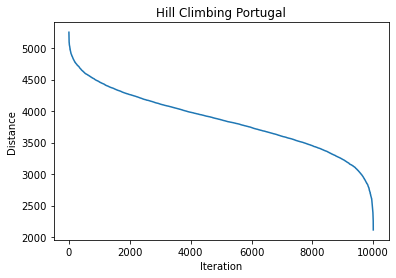

In [123]:
# Dataframe
hill_plot = pd.DataFrame(iterations,columns =['Interaction','Distance'])

# teste
x = hill_plot['Interaction']
y = hill_plot['Distance'].sort_values(ascending=False)
plt.plot(x,y)
plt.xlabel('Iteration') 
plt.ylabel('Distance') 
  
# displaying the title
plt.title("Hill Climbing Portugal")
plt.savefig("Hill_Climbing_Portugal_Distance_Behaviour")
plt.show()

### 1.3 Europe Data

In [124]:
europe_hill_climbing  = europa.to_numpy()
europe_hill_climbing

array([[   0,  160, 3082, ..., 1449, 1196,  861],
       [ 160,    0, 2766, ..., 1275, 1180,  687],
       [3082, 2766,    0, ..., 1995, 1886, 2449],
       ...,
       [1449, 1275, 1995, ...,    0,  610,  600],
       [1196, 1180, 1886, ...,  610,    0,  784],
       [ 861,  687, 2449, ...,  600,  784,    0]], dtype=int64)

In [125]:
#Get time of processing
start_time = time.time()

# Distances in km between cities, same indexes (i, j) as in the cities array
matrix = europe_hill_climbing
# Cities to travel
cities = ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']
city_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
# Index of start location
home = random.randrange(0,37)
# Max iterations
max_iterations = num_inter
# Distances in km between cities, same indexes (i, j) as in the cities array
matrix = europe_hill_climbing
# Run hill climbing to find a better solution
state = get_best_solution_by_distance(matrix, home)
state,iterations = hill_climbing(matrix, home, state, max_iterations, mut_rate)
print('-- Hill climbing solution --')
print(cities[home], end='')
df = [cities[home]]
for i in range(0, len(state.route)):
    print(' -> ' + cities[state.route[i]], end='')
    df.append(cities[state.route[i]]) 
print(' -> ' + cities[home], end='')
df.append(cities[home])
print('\n\nTotal distance: {0} km'.format(state.distance))
print()

#time
hill_europe_time = time.time() - start_time
print("--- %s seconds ---" % (hill_europe_time))

-- Hill climbing solution --
Bern -> Zurich -> Strasbourg -> Stuttgart -> Frankfurt -> Cologne -> Luxembourg -> Brussels -> Antwerp -> Rotterdam -> The Hague -> Amsterdam -> Calais -> London -> Le Havre -> Paris -> Lyon -> Geneva -> Turin -> Milan -> Genoa -> Nice -> Marseille -> Barcelona -> Madrid -> Lisbon -> Munich -> Prague -> Vienna -> Venice -> Rome -> Naples -> Berlin -> Hamburg -> Copenhagen -> Edinburgh -> Athens -> Bern

Total distance: 21433 km

--- 0.9692320823669434 seconds ---


#### Data Frame solution

In [126]:
#Get the Sequence
Solution_hill_europe=  pd.Series(df[:-1], name = "Cities")
route_europe_hill =  Solution_hill_europe
#transform df
dados = pd.DataFrame(Solution_hill_europe)
dados['Distance'] = 0
#Get the distances
for i in range(36):
    dados['Distance'].iloc[0] = europa[dados.iloc[0][0]][dados.iloc[36][0]] 
    dados['Distance'].iloc[i+1] = europa[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados.head()

,Cities,Distance
0,Bern,2627
1,Zurich,123
2,Strasbourg,218
3,Stuttgart,165
4,Frankfurt,205


#### Total Distance

In [127]:
#Minimal distance
hill_europe_distance = dados['Distance'].sum()
hill_europe_distance

21433

#### Iteration X Distance

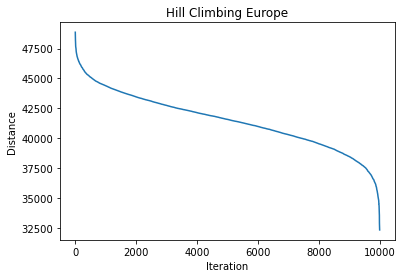

In [128]:
# Dataframe
hill_plot_e = pd.DataFrame(iterations,columns =['Interaction','Distance'])

# teste
x = hill_plot_e['Interaction']
y = hill_plot_e['Distance'].sort_values(ascending=False)
plt.plot(x,y)
plt.xlabel('Iteration') 
plt.ylabel('Distance') 
  
# displaying the title
plt.title("Hill Climbing Europe")
plt.savefig("Hill_Climbing_Europe_Distance_Behaviour")
plt.show()

## 2: Simulated Annealing

 Hill-Climbing and Simulated annealing share the same base of algorithm, which can be seen in item 1.

#### Simulated annealing with specific variables

In [129]:
# Setting mutation rate and temperature:
mut_rate = 0.7
initial_temp = 1000

# Return true with probability p
def probability(p):
    return p > random.uniform(0.0, 1.0)

# Schedule function for simulated annealing
def exp_schedule(k=initial_temp, lam=0.005, limit=num_inter):
    return lambda t: (k * np.exp(-lam * t) if t <= limit else 0)

# Simulated annealing
def simulated_annealing(matrix:[], home:int, initial_state:State, mutation_rate:float=0.01, schedule=exp_schedule()):
    # Keep track of the best state
    best_state = initial_state
    #list row
    row =[]
    # Loop a large number of times (int.max)
    for t in range(sys.maxsize):
        # Get a temperature
        T = schedule(t)
        # Return if temperature is 0
        if T == 0:
            return best_state, row
        # Mutate the best state
        neighbor = mutate(matrix, home, best_state, mutation_rate)
        # Calculate the change in e
        delta_e = best_state.distance - neighbor.distance
        # Check if we should update the best state
        if delta_e > 0 or probability(np.exp(delta_e / T)):
            best_state = neighbor
        row = row +[[t, neighbor.distance,T]]
    # Return the best state
    return best_state, row

### 2.1 Test Data

In [130]:
cities4_4_simulated_annealing  = cities4_4.to_numpy()
cities4_4_simulated_annealing

array([[  0,  54,  75,  76],
       [ 56,   0, 126,  61],
       [ 73, 125,   0, 146],
       [ 75,  61, 146,   0]], dtype=int64)

In [131]:
#Get time of processing
start_time = time.time()

# Cities to travel
cities = ['Porto','Braga','Aveiro','Viana do Castelo']
city_indexes = [0,1,2,3]

# Index of start location
home = random.randrange(0,4)

# Distances in miles between cities, same indexes (i, j) as in the cities array
matrix = cities4_4_simulated_annealing
        
# Run simulated annealing to find a better solution
state = get_best_solution_by_distance(matrix, home)
state,dfff = simulated_annealing(matrix, home, state, mut_rate)

#Best Solution
print('-- Simulated annealing solution --')
print(cities[home], end='')
df = [cities[home]]

for i in range(0, len(state.route)):
    print(' -> ' + cities[state.route[i]], end='')
    df.append(cities[state.route[i]]) 
print(' -> ' + cities[home], end='')
df.append(cities[home])
print('\n\nTotal distance: {0} km'.format(state.distance))

#time
SimuAnnealing_teste_time = time.time() - start_time
print("--- %s seconds ---" % (SimuAnnealing_teste_time))

-- Simulated annealing solution --
Braga -> Viana do Castelo -> Aveiro -> Porto -> Braga

Total distance: 334 km
--- 0.5136380195617676 seconds ---


#### Iteration X Distance

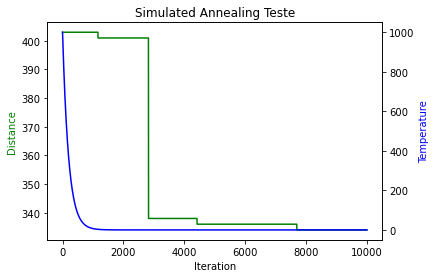

In [132]:
# Dataframe
simu_plot_t = pd.DataFrame(dfff,columns =['Interaction','Distance','Temperature'])
# teste
x = simu_plot_t['Interaction']
y1 = simu_plot_t['Distance'].sort_values(ascending=False)
y2 = simu_plot_t['Temperature']

#plot
fig,ax1 = plt.subplots()

#axis
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

#labels
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Distance', color='g')
ax2.set_ylabel('Temperature', color='b')

# displaying the title
plt.title("Simulated Annealing Teste")
plt.savefig("Simulated_Annealing_Teste_Distance_Behaviour")
plt.show()

#### Data Frame solution

In [133]:
#Get the Sequence
Solution_annealing_4_4=  pd.Series(df[:-1], name = "Cities")
route_teste_annealing = Solution_annealing_4_4
#transform df
dados = pd.DataFrame(Solution_annealing_4_4)
dados['Distance'] = 0
#Get the distances
for i in range(3):
    dados['Distance'].iloc[0] = cidades[dados.iloc[0][0]][dados.iloc[3][0]] 
    dados['Distance'].iloc[i+1] = cidades[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados

,Cities,Distance
0,Braga,54
1,Viana do Castelo,61
2,Aveiro,146
3,Porto,73


#### Total Distance

In [134]:
#Minimal distance
SimuAnnealing_teste_distance = dados['Distance'].sum()
SimuAnnealing_teste_distance

334

### 2.2 Portugal Data

In [135]:
cities14_14_simulated_annealing  = cities14_14.to_numpy()
cities14_14_simulated_annealing

array([[  0, 312, 364,  49, 205, 133, 255, 145, 277, 385, 176, 484, 224,
        319],
       [315,   0,  54, 349, 118, 405,  75, 181, 549,  76, 448, 205, 258,
        200],
       [367,  56,   0, 400, 170, 456, 126, 233, 601,  61, 500, 217, 309,
        252],
       [ 50, 347, 399,   0, 240,  99, 290, 180, 244, 420, 143, 519, 259,
        354],
       [207, 117, 169, 240,   0, 242,  60,  73, 441, 191, 340, 283, 140,
        152],
       [133, 402, 453,  99, 294,   0, 345, 235, 226, 475,  80, 462, 195,
        290],
       [256,  73, 125, 290,  59, 346,   0, 122, 490, 146, 389, 268, 199,
        158],
       [147, 181, 233, 181,  74, 237, 124,   0, 381, 254, 281, 353, 165,
        222],
       [278, 548, 599, 245, 440, 226, 490, 381,   0, 621, 146, 720, 460,
        554],
       [387,  75,  61, 420, 190, 476, 146, 253, 621,   0, 520, 271, 329,
        271],
       [177, 446, 498, 143, 338,  79, 389, 279, 147, 519,   0, 539, 273,
        368],
       [511, 206, 216, 545, 283, 461, 271, 

In [136]:
#Get time of processing
start_time = time.time()

# Cities to travel
cities = ['Lisboa','Porto','Braga','Setubal','Coimbra','Evora','Aveiro','Leiria','Faro','Viana do Castelo','Beja','Braganca','Castelo Branco','Guarda']
city_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

# Index of start location
home = random.randrange(0,14)
# Distances in miles between cities, same indexes (i, j) as in the cities array
matrix = cities14_14_simulated_annealing
        
# Run simulated annealing to find a better solution
state = get_best_solution_by_distance(matrix, home)
state,dfff = simulated_annealing(matrix, home, state, mut_rate)
print('-- Simulated annealing solution --')
print(cities[home], end='')
df = [cities[home]]
for i in range(0, len(state.route)):
    print(' -> ' + cities[state.route[i]], end='')
    df.append(cities[state.route[i]]) 
print(' -> ' + cities[home], end='')
df.append(cities[home])
print('\n\nTotal distance: {0} km'.format(state.distance))

#time
SimuAnnealing_portugal_time = time.time() - start_time
print("--- %s seconds ---" % (SimuAnnealing_portugal_time))


-- Simulated annealing solution --
Lisboa -> Castelo Branco -> Coimbra -> Aveiro -> Leiria -> Porto -> Braga -> Viana do Castelo -> Braganca -> Guarda -> Faro -> Beja -> Evora -> Setubal -> Lisboa

Total distance: 2219 km
--- 0.6602511405944824 seconds ---


#### Data Frame solution

In [137]:
#Get the Sequence
Solution_annealing_14_14=  pd.Series(df[:-1], name = "Cities")
route_portugal_annealing= Solution_annealing_14_14
#transform df
dados = pd.DataFrame(Solution_annealing_14_14)
dados['Distance'] = 0
#Get the distances
for i in range(13):
    dados['Distance'].iloc[0] = cidades[dados.iloc[0][0]][dados.iloc[13][0]] 
    dados['Distance'].iloc[i+1] = cidades[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados.head()

,Cities,Distance
0,Lisboa,50
1,Castelo Branco,224
2,Coimbra,140
3,Aveiro,60
4,Leiria,122


#### Total Distance

In [138]:
#Minimal distance
SimuAnnealing_portugal_distance = dados['Distance'].sum()
SimuAnnealing_portugal_distance

2219

#### Iteration X Distance

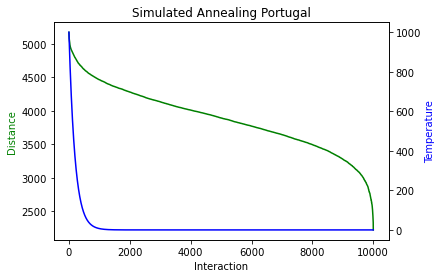

In [139]:
# Dataframe
simu_plot_p = pd.DataFrame(dfff,columns =['Interaction','Distance','Temperature'])
# teste
x = simu_plot_p['Interaction']
y1 = simu_plot_p['Distance'].sort_values(ascending=False)
y2 = simu_plot_p['Temperature']

#plot
fig,ax1 = plt.subplots()

#axis
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

#labels
ax1.set_xlabel('Interaction')
ax1.set_ylabel('Distance', color='g')
ax2.set_ylabel('Temperature', color='b')

# displaying the title
plt.title("Simulated Annealing Portugal")
plt.savefig("Simulated_Annealing_Portugal_Distance_Behaviour")
plt.show()

### 2.3 Europe Data

In [140]:
europe_simulated_annealing  = europa.to_numpy()
europe_simulated_annealing

array([[   0,  160, 3082, ..., 1449, 1196,  861],
       [ 160,    0, 2766, ..., 1275, 1180,  687],
       [3082, 2766,    0, ..., 1995, 1886, 2449],
       ...,
       [1449, 1275, 1995, ...,    0,  610,  600],
       [1196, 1180, 1886, ...,  610,    0,  784],
       [ 861,  687, 2449, ...,  600,  784,    0]], dtype=int64)

In [141]:
#Get time of processing
start_time = time.time()

# Cities to travel
cities = ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']
city_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]

# Index of start location
home = random.randrange(0,37)
# Distances in miles between cities, same indexes (i, j) as in the cities array
matrix = europe_simulated_annealing
        
# Run simulated annealing to find a better solution
state = get_best_solution_by_distance(matrix, home)
state,dfff = simulated_annealing(matrix, home, state, mut_rate)

print('-- Simulated annealing solution --')
print(cities[home], end='')
df = [cities[home]]
for i in range(0, len(state.route)):
   print(' -> ' + cities[state.route[i]], end='')
   df.append(cities[state.route[i]]) 
print(' -> ' + cities[home], end='')
df.append(cities[home])
print('\n\nTotal distance: {0} km'.format(state.distance))

#time
SimuAnnealing_europe_time = time.time() - start_time
print("--- %s seconds ---" % (SimuAnnealing_europe_time))

-- Simulated annealing solution --
Cologne -> Frankfurt -> Stuttgart -> Strasbourg -> Zurich -> Bern -> Geneva -> Lyon -> Marseille -> Nice -> Genoa -> Milan -> Turin -> Venice -> Munich -> Prague -> Vienna -> Berlin -> Hamburg -> Copenhagen -> Rotterdam -> The Hague -> Amsterdam -> Antwerp -> Brussels -> Calais -> London -> Le Havre -> Paris -> Luxembourg -> Barcelona -> Madrid -> Lisbon -> Rome -> Naples -> Edinburgh -> Athens -> Cologne

Total distance: 21983 km
--- 0.986990213394165 seconds ---


#### Data Frame solution

In [142]:
#Get the Sequence
Solution_annealing_europe=  pd.Series(df[:-1], name = "Cities")
route_europe_annealing =  Solution_annealing_europe
#transform df
dados = pd.DataFrame(Solution_annealing_europe)
dados['Distance'] = 0
#Get the distances
for i in range(36):
    dados['Distance'].iloc[0] = europa[dados.iloc[0][0]][dados.iloc[36][0]] 
    dados['Distance'].iloc[i+1] = europa[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados.head()

,Cities,Distance
0,Cologne,2562
1,Frankfurt,190
2,Stuttgart,205
3,Strasbourg,165
4,Zurich,218


#### Total Distance

In [143]:
#Minimal distance
SimuAnnealing_europe_distance = dados['Distance'].sum()
SimuAnnealing_europe_distance

21983

#### Iteration X Distance

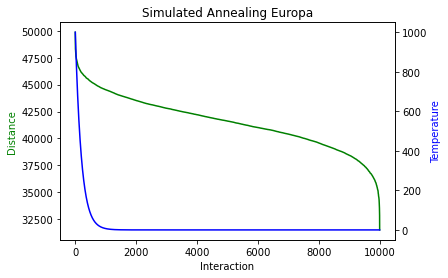

In [144]:
# Dataframe
simu_plot_e = pd.DataFrame(dfff,columns =['Interaction','Distance','Temperature'])
# teste
x = simu_plot_e['Interaction']
y1 = simu_plot_e['Distance'].sort_values(ascending=False)
y2 = simu_plot_e['Temperature']

#plot
fig,ax1 = plt.subplots()

#axis
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

#labels
ax1.set_xlabel('Interaction')
ax1.set_ylabel('Distance', color='g')
ax2.set_ylabel('Temperature', color='b')

# displaying the title
plt.title("Simulated Annealing Europa")
plt.savefig("Simulated_Annealing_Europa_Distance_Behaviour")
plt.show()

## 3:Tabu Search

### Algorithm

In [145]:
def candidates_generator(n): # The function generating all candidates
    k, x, y = 0, 0, 0
    for k in range(0, neighbourhood):
        while True:
            while True:
                x, y = choice(n), choice(n)
                if x != y:
                    break
            if [x, y] not in candidates:
                candidates.append([x, y]) # Populating list with small lists of two numbers
                break
    k += 1

def swap_method(t1, y): # The first type of neighbourhood
    x = solution.index(t1)
    copied_solution = new_solution.copy() # Copied solution which is used for experiments
    copied_solution[x], copied_solution[y] = copied_solution[y], copied_solution[x] # Swapping positions of these jobs in list
    neighbourhood_type = "swap"
    return copied_solution, neighbourhood_type

def count_score(o): # Functuion responsible for counting score
    time_travel, copied_solution = 0, o.copy()
    time_travel = np.double(time_travel)
    for i in range(0, len(m) - 1):
        first_city, second_city = copied_solution[i], copied_solution[i + 1]
        time_travel += m[first_city - 1, second_city - 1]
    time_travel += m[copied_solution[0] - 1, copied_solution[-1] - 1]
    return time_travel

### 3.1 Test data

In [146]:
#Get time
start_time = time.time() 

#Data
data = cities4_4.reset_index()

# Setting of the stop criterion
iterations = num_inter # Parameter 1
tabu_len = 2 # Parameter 2 (sqrt(n))
neighbourhood = 1 #Parameter 3

# Current solution initialization
solution = list(range(1, len(data) + 1)) # List of all job indexes from the file

# Creating array in order to conduct goal function calculations
m = np.delete(data.to_numpy(), 0, 1) # The first arrays column removal, because it contains indexes

# Solution Score
score = count_score(solution)

# Tabu list initialization
tabu = [] # Tabu list

# Creation of a candidate list of neighbors to the current solution
candidates = [] # A list of all candidates
scores_tabu_teste = []
#Generate Solution
i = 0
while i != iterations:
    z = candidates_generator(solution) # Generating candidates
    min_solution, min_score = solution.copy(), score
    tabu_pair = [] #If the move is considered it is held in this list untill it move is done and a new socre is set
    
    j = 0
    while j != neighbourhood: # checking neighbourhood
        pair, new_solution, new_score = candidates[j].copy(), solution.copy(), 0 #candidates_score[j]
        if pair not in tabu: 
            t1 = pair[0]
            y = new_solution.index(pair[1])
            new_solution, neighbourhood_type = swap_method(t1, y)
            new_score = count_score(new_solution)
            #Get distances
            scores_tabu_teste.append(min_score)
            if new_score < min_score: # Checking if a new socre is better than local socre
                min_solution, min_score, tabu_pair = new_solution.copy(), new_score, pair.copy()
                
        j += 1
    if min_score < score: # Checking if local score can replace previous score
        solution, score = min_solution.copy(), min_score
        tabu.append(tabu_pair)
    if len(tabu) == tabu_len: # Controlling the tabu list lenght
        del tabu[0]
    candidates.clear() # Preparing candidates list for the next iteration
    i += 1
print(f"The results of Tabu Search algorithm for Teste")
print(f"Solution: {solution}")

#Time
tabu_teste_time = time.time() - start_time
print("--- %s seconds ---" % (tabu_teste_time))

The results of Tabu Search algorithm for Teste
Solution: [3, 2, 4, 1]
--- 0.09190726280212402 seconds ---


#### Data frame solution

In [147]:
#Get the Sequence
solution=  pd.Series(solution, name = "Cities")
dados = pd.DataFrame(solution)

#Translate code for the name of cities
dict_cities = {1:'Porto',2:'Braga',3:'Aveiro',4:'Viana do Castelo'}
dados.replace({"Cities": dict_cities},inplace=True)
tabu_map_teste = dados['Cities']

#Tranform in df

dados['Distance'] = 0
#Get the distances
for i in range(3):
    dados['Distance'].iloc[0] = cities4_4[dados.iloc[0][0]][dados.iloc[3][0]] 
    dados['Distance'].iloc[i+1] = cities4_4[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados

,Cities,Distance
0,Aveiro,75
1,Braga,125
2,Viana do Castelo,61
3,Porto,75


#### Total Distance

In [148]:
#Minimal distance
best_solution_tabu_test = scores_tabu_teste[-1]
best_solution_tabu_test

334.0

#### Iteration X Solution

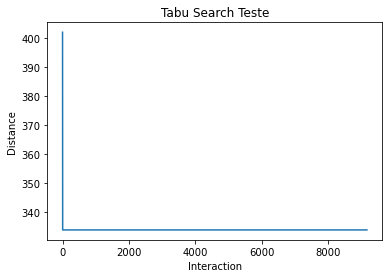

In [149]:
# Portugal
y = scores_tabu_teste
plt.plot(y)
plt.xlabel('Interaction') 
plt.ylabel('Distance') 
  
# displaying the title
plt.title("Tabu Search Teste")
plt.savefig("Tabu_Search_Teste_Distance_Behaviour")
plt.show()

### 3.2 Portugal Data

In [150]:
#Get time
start_time = time.time() 

# Import an Excel file into Python
data = pd.read_excel('cities.xlsx')

# Setting of the stop criterion
iterations = num_inter # Parameter 1
tabu_len = 4 # Parameter 2 (sqrt(n))
neighbourhood = 1
# Current solution initialization
solution = list(range(1, len(data) + 1)) # List of all job indexes from the file

# Creating array in order to conduct goal function calculations
m = np.delete(data.to_numpy(), 0, 1) # The first arrays column removal, because it contains indexes

score = count_score(solution)

# Tabu list initialization
tabu = [] # Tabu list

# Creation of a candidate list of neighbors to the current solution
candidates = [] # A list of all candidates
scores_tabu_portugal = []
i = 0
while i != iterations:
    z = candidates_generator(solution) # Generating candidates
    min_solution, min_score = solution.copy(), score
    tabu_pair = [] #If the move is considered it is held in this list untill it move is done and a new socre is set
    j = 0
    while j != neighbourhood: # checking neighbourhood
        pair, new_solution, new_score = candidates[j].copy(), solution.copy(), 0 #candidates_score[j]
        if pair not in tabu: 
            t1 = pair[0]
            y = new_solution.index(pair[1])
            new_solution, neighbourhood_type = swap_method(t1, y) 
            new_score = count_score(new_solution)
            #Get distances
            scores_tabu_portugal.append(min_score)
            if new_score < min_score: # Checking if a new socre is better than local socre
                min_solution, min_score, tabu_pair = new_solution.copy(), new_score, pair.copy()
               
        j += 1
    if min_score < score: # Checking if local score can replace previous score
        solution, score = min_solution.copy(), min_score
        tabu.append(tabu_pair)
    if len(tabu) == tabu_len: # Controlling the tabu list lenght
        del tabu[0]
    candidates.clear() # Preparing candidates list for the next iteration
    i += 1

print(f"The results of Tabu Search algorithm for Portugal")
print(f"Solution: {solution}")

#Time
tabu_portugal_time = time.time() - start_time
print("--- %s seconds ---" % (tabu_portugal_time))

The results of Tabu Search algorithm for Portugal
Solution: [13, 14, 12, 3, 10, 2, 7, 5, 8, 1, 4, 9, 11, 6]
--- 0.16184401512145996 seconds ---


#### Data frame solution

In [151]:
#Get the Sequence
solution=  pd.Series(solution, name = "Cities")
dados = pd.DataFrame(solution)

#Translate code for the name of cities
dict_cities = {1:'Lisboa',2:'Porto',3:'Braga',4:'Setubal',5:'Coimbra',6:'Evora',7:'Aveiro',8:'Leiria',9:'Faro',10:'Viana do Castelo',11:'Beja',12:'Braganca',13:'Castelo Branco',14:'Guarda'}
dados.replace({"Cities": dict_cities},inplace=True)
tabu_map_portugal = dados['Cities']

#Tranform in df

dados['Distance'] = 0
#Get the distances
for i in range(13):
    dados['Distance'].iloc[0] = cidades[dados.iloc[0][0]][dados.iloc[13][0]] 
    dados['Distance'].iloc[i+1] = cidades[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados.head()

,Cities,Distance
0,Castelo Branco,195
1,Guarda,99
2,Braganca,177
3,Braga,216
4,Viana do Castelo,61


#### Total Distance

In [152]:
#Minimal distance
best_solution_tabu_portugal = scores_tabu_portugal[-1]
best_solution_tabu_portugal

1695.0

#### Iteration X Solution

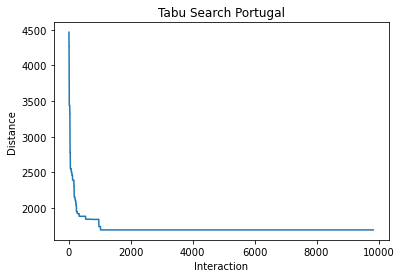

In [153]:
# Portugal
y = scores_tabu_portugal
plt.plot(y)
plt.xlabel('Interaction') 
plt.ylabel('Distance') 
  
# displaying the title
plt.title("Tabu Search Portugal")
plt.savefig("Tabu_Search_Portugal_Distance_Behaviour")
plt.show()

### 3.3 Europa Data

In [178]:
#Get time
start_time = time.time() 

# Import an Excel file into Python
data = pd.read_excel('europe_cities.xlsx')

# Setting of the stop criterion
iterations = num_inter # Parameter 1
tabu_len = 6 # Parameter 2 (sqrt(n))
neighbourhood = 1 # Parameter 3


# Current solution initialization
solution = list(range(1, len(data) + 1)) # List of all job indexes from the file

# Creating array in order to conduct goal function calculations
m = np.delete(data.to_numpy(), 0, 1) # The first arrays column removal, because it contains indexes

# Solution Score
score = count_score(solution)

# Tabu list initialization
tabu = [] # Tabu list

# Creation of a candidate list of neighbors to the current solution
candidates = [] # A list of all candidates
scores_tabu_europe = []
#Generate Solution
i = 0
while i != iterations:
    z = candidates_generator(solution) # Generating candidates
    min_solution, min_score = solution.copy(), score
    tabu_pair = [] #If the move is considered it is held in this list untill it move is done and a new socre is set
    j = 0
    while j != neighbourhood: # checking neighbourhood
        pair, new_solution, new_score = candidates[j].copy(), solution.copy(), 0 #candidates_score[j]
        if pair not in tabu: 
            t1 = pair[0]
            y = new_solution.index(pair[1])
            new_solution, neighbourhood_type = swap_method(t1, y)
            new_score = count_score(new_solution)
            scores_tabu_europe.append(min_score)
            if new_score < min_score: # Checking if a new socre is better than local socre
                min_solution, min_score, tabu_pair = new_solution.copy(), new_score, pair.copy()
        j += 1
    if min_score < score: # Checking if local score can replace previous score
        solution, score = min_solution.copy(), min_score
        tabu.append(tabu_pair)
    if len(tabu) == tabu_len: # Controlling the tabu list lenght
        del tabu[0]
    candidates.clear() # Preparing candidates list for the next iteration
    i += 1
print(f"The results of Tabu Search algorithm for Europa")
print(f"Solution: {solution}")

#Time
tabu_europe_time = time.time() - start_time
print("--- %s seconds ---" % (tabu_europe_time))

The results of Tabu Search algorithm for Europa
Solution: [28, 5, 15, 10, 12, 31, 19, 9, 1, 33, 30, 2, 7, 11, 18, 8, 16, 27, 17, 21, 4, 20, 22, 26, 34, 23, 14, 25, 29, 35, 13, 6, 37, 32, 24, 3, 36]
--- 0.27776169776916504 seconds ---


#### Data frame solution

In [179]:
#Get the Sequence
solution=  pd.Series(solution, name = "Cities")
dados = pd.DataFrame(solution)

#Translate code for the name of cities
dict_cities = {1:'Amsterdam', 2:'Antwerp', 3:'Athens', 4:'Barcelona', 5:'Berlin', 6:'Bern',
7:'Brussels',8: 'Calais',9: 'Cologne',10: 'Copenhagen',11: 'Edinburgh',12: 'Frankfurt',
13:'Geneva',14: 'Genoa',15: 'Hamburg',16: 'Le Havre',17: 'Lisbon',18: 'London',
19:'Luxembourg',20: 'Lyon',21: 'Madrid',22: 'Marseille',23: 'Milan',24: 'Munich',
25:   'Naples',26: 'Nice',27: 'Paris',28: 'Prague',29: 'Rome',30: 'Rotterdam',31: 'Strasbourg',
32:'Stuttgart', 33:'The Hague',34: 'Turin',35: 'Venice',36: 'Vienna',37: 'Zurich'}

dados.replace({"Cities": dict_cities},inplace=True)
tabu_map_europe = dados['Cities']

#Tranform in df
dados['Distance'] = 0
#Get the distances
for i in range(36):
    dados['Distance'].iloc[0] = europa[dados.iloc[0][0]][dados.iloc[36][0]] 
    dados['Distance'].iloc[i+1] = europa[dados.iloc[i+1][0]][dados.iloc[i][0]] 

dados.head()

,Cities,Distance
0,Prague,312
1,Berlin,354
2,Hamburg,291
3,Copenhagen,321
4,Frankfurt,799


#### Total Distance

In [180]:
#Minimal distance
best_solution_tabu_europe = scores_tabu_europe[-1]
best_solution_tabu_europe

17339.0

#### Iteration X Solution

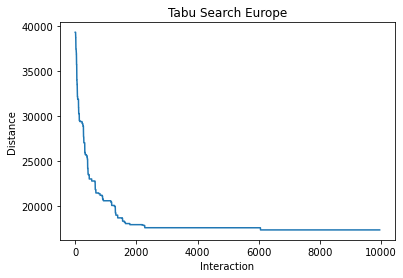

In [181]:
# Portugal
y = scores_tabu_europe
plt.plot(y)
plt.xlabel('Interaction') 
plt.ylabel('Distance') 
  
# displaying the title
plt.title("Tabu Search Europe")
plt.savefig("Tabu_Search_Europe_Distance_Behaviour")
plt.show()

## 4: Genetic Algorithms

### Algorithm

In [158]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

#define fitnes list

def get_all_fitnes(population_set, cities_dict):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)
    
    minimum = fitnes_list.min()
    return fitnes_list, minimum

def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

#define progenitor list
def progenitor_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])

#Crossover
def mate_progenitors(prog_a, prog_b):
    offspring = prog_a[0:5]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring

def mate_population(progenitor_list):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = mate_progenitors(prog_a, prog_b)
        new_population_set.append(offspring)
        
    return new_population_set

#Mutation
def mutate_offspring(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)

        offspring[a], offspring[b] = offspring[b], offspring[a]

    return offspring
    
def mutate_population(new_population_set):
    mutated_pop = []
    for offspring in new_population_set:
        mutated_pop.append(mutate_offspring(offspring))
    return mutated_pop

#### Data preparation

In [159]:
location = pd.read_excel('location.xlsx', index_col=0 )
cidades['latitude'] = location['latitude']
cidades['longitude'] = location['longitude']
cidades

,Lisboa,Porto,Braga,Setubal,Coimbra,Evora,Aveiro,Leiria,Faro,Viana do Castelo,Beja,Braganca,Castelo Branco,Guarda,latitude,longitude
Lisboa,0,312,364,49,205,133,255,145,277,385,176,484,224,319,38.7452,-9.1604
Porto,315,0,54,349,118,405,75,181,549,76,448,205,258,200,41.1495,-8.6108
Braga,367,56,0,400,170,456,126,233,601,61,500,217,309,252,41.5333,-8.4167
Setubal,50,347,399,0,240,99,290,180,244,420,143,519,259,354,38.5243,-8.8926
Coimbra,207,117,169,240,0,242,60,73,441,191,340,283,140,152,40.2111,-8.4291
Evora,133,402,453,99,294,0,345,235,226,475,80,462,195,290,38.5667,-7.9000
Aveiro,256,73,125,290,59,346,0,122,490,146,389,268,199,158,40.6389,-8.6553
Leiria,147,181,233,181,74,237,124,0,381,254,281,353,165,222,39.7444,-8.8072
Faro,278,548,599,245,440,226,490,381,0,621,146,720,460,554,37.0161,-7.9350
Viana do Castelo,387,75,61,420,190,476,146,253,621,0,520,271,329,271,41.7000,-8.8333


### 4.1 Teste Data 

In [160]:
# Teste
cities4_4 = cidades[['Porto','Braga','Aveiro','Viana do Castelo','latitude','longitude']].loc[['Porto','Braga','Aveiro','Viana do Castelo']]
cities4_4

,Porto,Braga,Aveiro,Viana do Castelo,latitude,longitude
Porto,0,54,75,76,41.1495,-8.6108
Braga,56,0,126,61,41.5333,-8.4167
Aveiro,73,125,0,146,40.6389,-8.6553
Viana do Castelo,75,61,146,0,41.7000,-8.8333


In [161]:
#Get time
start_time = time.time() 

#Data transformation
names_list = list(cities4_4)
names_list = np.array(names_list)

#Parameters
#number of cities
n_cities = len(cities4_4)
#Population generated
n_population = 10
#mutation rate of progenitors
mutation_rate = 0.3

# list of coordenades representing each city
lat = cities4_4.latitude
lon = cities4_4.longitude
coordinates_list = [[x,y] for x,y in list(zip(lat,lon))]
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

#define population set
population_set = genesis(names_list, n_population)
#define fitnes list
fitnes_list,minimum = get_all_fitnes(population_set,cities_dict)
#define progenitor list
progenitor_list = progenitor_selection(population_set,fitnes_list)
#define new population set
new_population_set = mate_population(progenitor_list)
#define mutate population
mutated_pop = mutate_population(new_population_set)
#Solution of the node
best_solution = [-1,np.inf,np.array([])]

row = []

for i in range(num_inter):
    fitnes_list, minimum = get_all_fitnes(mutated_pop,cities_dict)
    row = row +[minimum]
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    mutated_pop = mutate_population(new_population_set)

#Best Result
print(best_solution)
#Time
genetic_teste_time = time.time() - start_time
print("--- %s seconds ---" % (genetic_teste_time))

[0, 1.391339506773567, array([['Viana do Castelo', 'Braga', 'Porto', 'Aveiro']], dtype='<U16')]
--- 4.824253559112549 seconds ---


#### Data frame solution

In [162]:
#Best solution
Solution_Genetic_4_4 = best_solution
best_route = Solution_Genetic_4_4[2][0].flatten().tolist()
best_route = pd.DataFrame(best_route, columns=['Cities'])
gene_algo_teste = best_route['Cities']
best_route['Distance'] = 0

#Get Distance
for i in range(3):
    best_route['Distance'].iloc[0] = cidades[best_route.iloc[0][0]][best_route.iloc[3][0]] 
    best_route['Distance'].iloc[i+1] = cidades[best_route.iloc[i+1][0]][best_route.iloc[i][0]] 

best_route

,Cities,Distance
0,Viana do Castelo,146
1,Braga,61
2,Porto,56
3,Aveiro,75


#### Total Distance

In [163]:
#Minimal distance
Genetic_teste_distance = best_route['Distance'].sum()
Genetic_teste_distance

338

#### Iteraction X Fitness

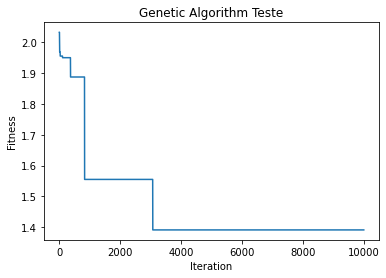

In [164]:
df = pd.DataFrame(row, columns =['Minimum fitness value of pop'])

# Portugal
y = list(df['Minimum fitness value of pop'].sort_values(ascending=False))
plt.plot(y)
plt.ylabel('Fitness')
plt.xlabel('Iteration') 
  
# displaying the title
plt.title("Genetic Algorithm Teste")
plt.savefig("Genetic_Algorithm_Teste_Fitness_Behaviour")
plt.show()

### 4.2 Portugal Data

In [165]:
# Portugal
cities14_14 = cidades
cities14_14

,Lisboa,Porto,Braga,Setubal,Coimbra,Evora,Aveiro,Leiria,Faro,Viana do Castelo,Beja,Braganca,Castelo Branco,Guarda,latitude,longitude
Lisboa,0,312,364,49,205,133,255,145,277,385,176,484,224,319,38.7452,-9.1604
Porto,315,0,54,349,118,405,75,181,549,76,448,205,258,200,41.1495,-8.6108
Braga,367,56,0,400,170,456,126,233,601,61,500,217,309,252,41.5333,-8.4167
Setubal,50,347,399,0,240,99,290,180,244,420,143,519,259,354,38.5243,-8.8926
Coimbra,207,117,169,240,0,242,60,73,441,191,340,283,140,152,40.2111,-8.4291
Evora,133,402,453,99,294,0,345,235,226,475,80,462,195,290,38.5667,-7.9000
Aveiro,256,73,125,290,59,346,0,122,490,146,389,268,199,158,40.6389,-8.6553
Leiria,147,181,233,181,74,237,124,0,381,254,281,353,165,222,39.7444,-8.8072
Faro,278,548,599,245,440,226,490,381,0,621,146,720,460,554,37.0161,-7.9350
Viana do Castelo,387,75,61,420,190,476,146,253,621,0,520,271,329,271,41.7000,-8.8333


In [166]:
#Get time
start_time = time.time() 

#Parameters
names_list = list(cities14_14)
names_list = np.array(names_list)
n_cities = len(cities14_14)
n_population = 10
mutation_rate = 0.3

# list of coordenades representing each city
lat = cities14_14.latitude
lon = cities14_14.longitude
coordinates_list = [[x,y] for x,y in list(zip(lat,lon))]
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

#define population set
population_set = genesis(names_list, n_population)
#define fitnes list
fitnes_list, minimum = get_all_fitnes(population_set,cities_dict)
#define progenitor list
progenitor_list = progenitor_selection(population_set,fitnes_list)
#define new population set
new_population_set = mate_population(progenitor_list)
#define mutate population
mutated_pop = mutate_population(new_population_set)
#Solution of the node
best_solution = [-1,np.inf,np.array([])]

row = []

for i in range(num_inter):
    fitnes_list, minimum = get_all_fitnes(mutated_pop,cities_dict)
    row = row +[minimum]
    
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

#Best Result
print(best_solution)

#Time
genetic_portugal_time = time.time() - start_time
print("--- %s seconds ---" % (genetic_portugal_time))

[549, 15.015669120057273, array([['Faro', 'Beja', 'Coimbra', 'Aveiro', 'Leiria', 'Evora',
        'Setubal', 'Lisboa', 'Castelo Branco', 'Guarda',
        'Viana do Castelo', 'Braga', 'Porto', 'Braganca']], dtype='<U16')]
--- 15.833770513534546 seconds ---


#### Data frame solution

In [167]:
#Best solution
Solution_Genetic_14_14 = best_solution
best_route = Solution_Genetic_14_14[2][0].flatten().tolist()
best_route = pd.DataFrame(best_route, columns=['Cities'])
gene_algo_portugal = best_route['Cities']
best_route['Distance'] = 0

#Get Distance
for i in range(13):
    best_route['Distance'].iloc[0] = cidades[best_route.iloc[0][0]][best_route.iloc[13][0]] 
    best_route['Distance'].iloc[i+1] = cidades[best_route.iloc[i+1][0]][best_route.iloc[i][0]] 

best_route.head()

,Cities,Distance
0,Faro,745
1,Beja,146
2,Coimbra,338
3,Aveiro,60
4,Leiria,122


#### Total Distance

In [168]:
#Minimal distance
Genetic_portugal_distance = best_route['Distance'].sum()
Genetic_portugal_distance

2715

#### Iteration X Fitness

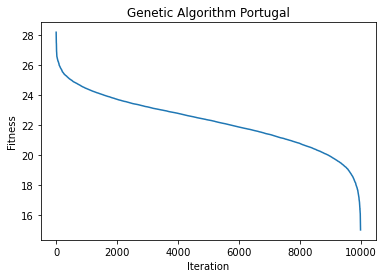

In [169]:
df = pd.DataFrame(row, columns =['Minimum fitness value of pop'])

# Portugal
y = list(df['Minimum fitness value of pop'].sort_values(ascending=False))
plt.plot(y)
plt.ylabel('Fitness')
plt.xlabel('Iteration') 
  
# displaying the title
plt.title("Genetic Algorithm Portugal")
plt.savefig("Genetic_Algorithm_Portugal_Fitness_Behaviour")
plt.show()

### 4.3 Europe Data

#### Data Preparation

In [170]:
#Location world
europe_location = pd.read_excel('worldcities.xlsx')

#list of cities
lista =  ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']
europe_location = europe_location[europe_location['city_ascii'].isin(lista)]

#erase countries
country = ['USA','VEN','COL','PHL','CAN']
europe_location = europe_location[~europe_location['iso3'].isin(country)]

#erase duplicate city
europe_location = europe_location[europe_location['lat']!= 45.5849]

#interesting columns 
europe_location = europe_location[['city_ascii','lat','lng']]

#Europa
europe = pd.read_excel('europe_cities.xlsx')

data = pd.merge(europe,europe_location,left_on='Unnamed: 0',right_on='city_ascii',how='inner')
data = data[['Unnamed: 0','Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich','lat','lng']]

data = data.set_index('Unnamed: 0')
data


,Amsterdam,Antwerp,Athens,Barcelona,Berlin,Bern,Brussels,Calais,Cologne,Copenhagen,...,Rotterdam,Strasbourg,Stuttgart,The Hague,Turin,Venice,Vienna,Zurich,lat,lng
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Amsterdam,0,160,3082,1639,649,875,209,385,280,904,...,80,683,703,56,1264,1449,1196,861,52.3667,4.8833
Antwerp,160,0,2766,1465,723,704,46,211,237,861,...,100,544,659,139,1090,1275,1180,687,51.2211,4.3997
Athens,3082,2766,0,3312,2552,2627,3021,2976,2562,3414,...,2826,2581,2428,3061,2250,1995,1886,2449,37.9842,23.7281
Barcelona,1639,1465,3312,0,1899,913,1419,1399,1539,2230,...,1565,1072,1263,1589,892,1327,1989,1036,41.3825,2.1769
Berlin,649,723,2552,1899,0,986,782,936,575,743,...,697,801,636,712,1172,1108,666,863,52.5167,13.3833
Bern,875,704,2627,913,986,0,655,854,583,1392,...,802,232,350,825,312,642,907,123,46.9480,7.4474
Brussels,209,46,3021,1419,782,655,0,212,219,1035,...,146,488,641,170,1044,1229,1134,641,50.8353,4.3314
Calais,385,211,2976,1399,936,854,212,0,431,1075,...,311,627,792,352,1110,1352,1346,764,50.9481,1.8564
Cologne,280,237,2562,1539,575,583,219,431,0,730,...,254,402,395,283,1015,1072,915,612,50.9422,6.9578


In [171]:
#Get time
start_time = time.time() 

#Parameters
names_list = list(data)
names_list = np.array(names_list)
n_cities = len(data)
n_population = 10
mutation_rate = 0.3

# list of coordenades representing each city
lat = data.lat
lon = data.lng
coordinates_list = [[x,y] for x,y in list(zip(lat,lon))]
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

#define population set
population_set = genesis(names_list, n_population)
#define fitnes list
fitnes_list, minimum = get_all_fitnes(population_set,cities_dict)
#define progenitor list
progenitor_list = progenitor_selection(population_set,fitnes_list)
#define new population set
new_population_set = mate_population(progenitor_list)
#define mutate population
mutated_pop = mutate_population(new_population_set)
#Solution of the node
best_solution = [-1,np.inf,np.array([])]

row = []

for i in range(num_inter):
    fitnes_list,minimum = get_all_fitnes(mutated_pop,cities_dict)
    row = row +[minimum]
    #Saving the best solution
    if fitnes_list.min() < best_solution[1]:
        best_solution[0] = i
        best_solution[1] = fitnes_list.min()
        best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]
    
    progenitor_list = progenitor_selection(population_set,fitnes_list)
    new_population_set = mate_population(progenitor_list)
    
    mutated_pop = mutate_population(new_population_set)

#Best Result
print(best_solution)

#Time
genetic_europe_time = time.time() - start_time
print("--- %s seconds ---" % (genetic_europe_time))

[2979, 238.55130592448756, array([['Lyon', 'Paris', 'Rome', 'Naples', 'Athens', 'Le Havre',
        'London', 'Zurich', 'Turin', 'Stuttgart', 'Hamburg', 'Antwerp',
        'Prague', 'Vienna', 'Frankfurt', 'Munich', 'Venice', 'Milan',
        'Brussels', 'Amsterdam', 'Calais', 'Edinburgh', 'Barcelona',
        'Marseille', 'Madrid', 'Lisbon', 'Copenhagen', 'Berlin',
        'The Hague', 'Luxembourg', 'Cologne', 'Bern', 'Geneva', 'Nice',
        'Strasbourg', 'Rotterdam', 'Genoa']], dtype='<U10')]
--- 43.74266958236694 seconds ---


#### Data frame solution

In [172]:
#Best solution
Solution_Genetic_Europe = best_solution
best_route = Solution_Genetic_Europe[2][0].flatten().tolist()
best_route = pd.DataFrame(best_route, columns=['Cities'])
gene_algo_europe = best_route['Cities']
best_route['Distance'] = 0

#Get Distance
for i in range(36):
    best_route['Distance'].iloc[0] = europa[best_route.iloc[0][0]][best_route.iloc[36][0]] 
    best_route['Distance'].iloc[i+1] = europa[best_route.iloc[i+1][0]][best_route.iloc[i][0]] 

best_route

,Cities,Distance
0,Lyon,541
1,Paris,481
2,Rome,1531
3,Naples,233
4,Athens,2784
5,Le Havre,3394
6,London,406
7,Zurich,963
8,Turin,444
9,Stuttgart,642


#### Total Distance

In [173]:
#Minimal distance
Genetic_europe_distance = best_route['Distance'].sum()
Genetic_europe_distance

31715

#### Iteration x Fitness

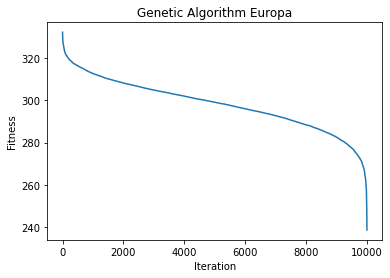

In [174]:
df = pd.DataFrame(row, columns =['Minimum fitness value of pop'])

# Portugal
y = list(df['Minimum fitness value of pop'].sort_values(ascending=False))
plt.plot(y)
plt.ylabel('Fitness')
plt.xlabel('Iteration') 
  
# displaying the title
plt.title("Genetic Algorithm Europa")
plt.savefig("Genetic_Algorithm_Europa_Fitness_Behaviour")
plt.show()

## Data Visualization

### Summary of algorithms

In [182]:
summary = [['Hill-Climbing', 'Teste',hill_teste_distance,hill_teste_time], ['Hill-Climbing', 'Portugal',hill_portugal_distance ,hill_portugal_time],['Hill-Climbing', 'Europe',hill_europe_distance ,hill_europe_time], 
           ['Simulated Annealing', 'Teste',SimuAnnealing_teste_distance,SimuAnnealing_teste_time], ['Simulated Annealing', 'Portugal',SimuAnnealing_portugal_distance ,SimuAnnealing_portugal_time],['Simulated Annealing', 'Europe',SimuAnnealing_europe_distance ,SimuAnnealing_europe_time],
           ['Tabu Search', 'Teste',best_solution_tabu_test,tabu_teste_time], ['Tabu Search', 'Portugal',best_solution_tabu_portugal ,tabu_portugal_time],['Tabu Search', 'Europe',best_solution_tabu_europe,tabu_europe_time],
           ['Genetic', 'Teste',Genetic_teste_distance,genetic_teste_time], ['Genetic', 'Portugal',Genetic_portugal_distance,genetic_portugal_time],['Genetic', 'Europe',Genetic_europe_distance,genetic_europe_time]] 

# Create the pandas DataFrame
df_summary = pd.DataFrame(summary, columns = ['Algorithm', 'Example','Distance','Time'])
 
# print dataframe.
df_summary

,Algorithm,Example,Distance,Time
0,Hill-Climbing,Teste,334.0,0.397601
1,Hill-Climbing,Portugal,1853.0,0.664925
2,Hill-Climbing,Europe,21433.0,0.969232
3,Simulated Annealing,Teste,334.0,0.513638
4,Simulated Annealing,Portugal,2219.0,0.660251
5,Simulated Annealing,Europe,21983.0,0.986990
6,Tabu Search,Teste,334.0,0.091907
7,Tabu Search,Portugal,1695.0,0.161844
8,Tabu Search,Europe,17339.0,0.277762
9,Genetic,Teste,338.0,4.824254


##### Best Distance found of each algorithm

In [183]:
table_distance = pd.pivot_table(df_summary, values='Distance', index=['Algorithm'],columns=['Example'])
table_distance = table_distance.style.highlight_min(color='lightgreen')
dfi.export(table_distance, ' Best_Route_Distance_per_Algorithm.png')
table_distance

Example,Europe,Portugal,Teste
Algorithm,,,
Genetic,31715.000000,2715.000000,338.000000
Hill-Climbing,21433.000000,1853.000000,334.000000
Simulated Annealing,21983.000000,2219.000000,334.000000
Tabu Search,17339.000000,1695.000000,334.000000


##### Processing Time (seconds) of each algorithm

In [184]:
table_time = pd.pivot_table(df_summary, values='Time', index=['Algorithm'],columns=['Example'], aggfunc=np.sum)
table_time = table_time.style.highlight_min(color='lightgreen')
dfi.export(table_time, ' Best_Time_per_Algorithm.png')
table_time

Example,Europe,Portugal,Teste
Algorithm,,,
Genetic,43.742670,15.833771,4.824254
Hill-Climbing,0.969232,0.664925,0.397601
Simulated Annealing,0.986990,0.660251,0.513638
Tabu Search,0.277762,0.161844,0.091907


### Routes

##### Test Route: Hill-Climbing

In [73]:
#Data preparation
location = pd.read_excel('location.xlsx', index_col=0 )
rota = pd.merge(route_teste_hill,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(4):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[3],longitude_list[3], color = 'darkred', label = 'FI')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Hill_Climbing_Teste.html" )

from IPython.display import IFrame
IFrame(src='Hill_Climbing_Teste.html', width=900, height=600)

##### Portugal Route: Hill-Climbing

In [74]:
#Data preparation
rota = pd.merge(route_portugal_hill,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(13):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[13],longitude_list[13], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Hill_Climbing_Portugal.html" )

from IPython.display import IFrame
IFrame(src='Hill_Climbing_Portugal.html', width=900, height=600)

#####  Europe Route: Hill-Climbing

In [75]:
#Data preparation

#Location world
europe_location = pd.read_excel('worldcities.xlsx')

#list of cities
lista =  ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']
europe_location = europe_location[europe_location['city_ascii'].isin(lista)]

#erase countries
country = ['USA','VEN','COL','PHL','CAN']
europe_location = europe_location[~europe_location['iso3'].isin(country)]

#erase duplicate city
europe_location = europe_location[europe_location['lat']!= 45.5849]

#interesting columns 
europe_location = europe_location[['city_ascii','lat','lng']]

rota = pd.merge(route_europe_hill,europe_location,how='inner',left_on='Cities',right_on='city_ascii')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36]

#Lists

latitude_list = rota['lat'].to_numpy()
longitude_list = rota['lng'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['lat'][0],rota['lng'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(36):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[36],longitude_list[36], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Hill_Climbing_Europa.html" )

from IPython.display import IFrame
IFrame(src='Hill_Climbing_Europa.html', width=1500, height=800)

#####  Test Route: Simulated Annealing

In [76]:
#Data preparation
location = pd.read_excel('location.xlsx', index_col=0 )
rota = pd.merge(route_teste_annealing,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(4):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[3],longitude_list[3], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Simulated_Annealing_Teste.html" )

from IPython.display import IFrame
IFrame(src='Simulated_Annealing_Teste.html', width=900, height=600)

#####  Portugal Route: Simulated Annealing

In [77]:
#Data preparation
rota = pd.merge(route_portugal_annealing,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(13):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[13],longitude_list[13], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Simulated_Annealing_Portugal.html" )

from IPython.display import IFrame
IFrame(src='Simulated_Annealing_Portugal.html', width=900, height=600)

#####  Europe Route: Simulated Annealing

In [78]:
#Data preparation

#Location world
europe_location = pd.read_excel('worldcities.xlsx')

#list of cities
lista =  ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']
europe_location = europe_location[europe_location['city_ascii'].isin(lista)]

#erase countries
country = ['USA','VEN','COL','PHL','CAN']
europe_location = europe_location[~europe_location['iso3'].isin(country)]

#erase duplicate city
europe_location = europe_location[europe_location['lat']!= 45.5849]

#interesting columns 
europe_location = europe_location[['city_ascii','lat','lng']]

rota = pd.merge(route_europe_annealing,europe_location,how='inner',left_on='Cities',right_on='city_ascii')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36]

#Lists

latitude_list = rota['lat'].to_numpy()
longitude_list = rota['lng'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['lat'][0],rota['lng'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(36):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[36],longitude_list[36], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Simulated_Annealing_Europe.html" )

from IPython.display import IFrame
IFrame(src='Simulated_Annealing_Europe.html', width=1500, height=800)

#####  Test Route: Tabu Search

In [79]:
#Data preparation
location = pd.read_excel('location.xlsx', index_col=0 )
rota = pd.merge(tabu_map_teste,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(4):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[3],longitude_list[3], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Tabu_Search_Teste.html" )

from IPython.display import IFrame
IFrame(src='Tabu_Search_Teste.html', width=900, height=600)

#####  Portugal Route: Tabu Search

In [80]:
#Data preparation
rota = pd.merge(tabu_map_portugal,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(13):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[13],longitude_list[13], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Tabu_Search_Portugal.html" )

from IPython.display import IFrame
IFrame(src='Tabu_Search_Portugal.html', width=900, height=600)

#####  Europe Route: Tabu Search

In [81]:
#Data preparation

#Location world
europe_location = pd.read_excel('worldcities.xlsx')

#list of cities
lista =  ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']
europe_location = europe_location[europe_location['city_ascii'].isin(lista)]

#erase countries
country = ['USA','VEN','COL','PHL','CAN']
europe_location = europe_location[~europe_location['iso3'].isin(country)]

#erase duplicate city
europe_location = europe_location[europe_location['lat']!= 45.5849]

#interesting columns 
europe_location = europe_location[['city_ascii','lat','lng']]

rota = pd.merge(tabu_map_europe,europe_location,how='inner',left_on='Cities',right_on='city_ascii')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36]

#Lists

latitude_list = rota['lat'].to_numpy()
longitude_list = rota['lng'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['lat'][0],rota['lng'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(36):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[36],longitude_list[36], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Tabu_Search_Europe.html" )

from IPython.display import IFrame
IFrame(src='Tabu_Search_Europe.html', width=1500, height=800)

#####  Test Route: Genetics Algorithm

In [82]:
#Data preparation
location = pd.read_excel('location.xlsx', index_col=0 )
rota = pd.merge(gene_algo_teste,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(4):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[3],longitude_list[3], color = 'darkred', label = 'FI')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Genetic_Algorithm_Teste.html" )

from IPython.display import IFrame
IFrame(src='Genetic_Algorithm_Teste.html', width=900, height=600)

#####  Portugal Route:  Genetics Algorithm

In [83]:
#Data preparation
rota = pd.merge(gene_algo_portugal,location,how='inner',left_on='Cities',right_on='cidade')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

#Lists
localizacao = rota[['latitude', 'longitude']]
latitude_list = rota['latitude'].to_numpy()
longitude_list = rota['longitude'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['latitude'][0],rota['longitude'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(13):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[13],longitude_list[13], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Genetic_Algorithm_Portugal.html" )

from IPython.display import IFrame
IFrame(src='Genetic_Algorithm_Portugal.html', width=900, height=600)

#####  Europe Route:  Genetics Algorithm

In [84]:
#Data preparation

#Location world
europe_location = pd.read_excel('worldcities.xlsx')

#list of cities
lista =  ['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich']
europe_location = europe_location[europe_location['city_ascii'].isin(lista)]

#erase countries
country = ['USA','VEN','COL','PHL','CAN']
europe_location = europe_location[~europe_location['iso3'].isin(country)]

#erase duplicate city
europe_location = europe_location[europe_location['lat']!= 45.5849]

#interesting columns 
europe_location = europe_location[['city_ascii','lat','lng']]

rota = pd.merge(gene_algo_europe,europe_location,how='inner',left_on='Cities',right_on='city_ascii')

#Cities
sequence = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36]

#Lists

latitude_list = rota['lat'].to_numpy()
longitude_list = rota['lng'].to_numpy()

#Create the plot
gmap3 = gmplot.GoogleMapPlotter(rota['lat'][0],rota['lng'][0], 8)


# scatter method of map object 
# scatter points on the google map
gmap3.scatter( latitude_list, longitude_list, size = 400, marker = True )

#Put labels
for i in range(36):
    gmap3.marker(latitude_list[i],longitude_list[i], label= sequence[i], color ='cornflowerblue')

gmap3.marker(latitude_list[0],longitude_list[0], color='green', label = 'St')
gmap3.marker(latitude_list[36],longitude_list[36], color = 'darkred', label = 'Fi')

# Plot method Draw a line in
gmap3.plot(latitude_list, longitude_list, 'cornflowerblue', edge_width = 2.5)

gmap3.draw( "Genetic__Algorithm_Europe.html" )

from IPython.display import IFrame
IFrame(src='Genetic__Algorithm_Europe.html', width=1500, height=800)